## Classical Mechanics - Week 13

### Last Week:
- Took a break from computation

### This Week:
- Revisit planetary motion
- Introduce multiple bodies into our system
- Experience how many-body problems can be analyzed using classes
- Gain experience with classes

This will be your final Notebook for this course. Hopefully you feel as though you gained something from the semester through these assignments, lectures, and homework, as this course is often the one that introduces young physicists fully into the field.

So to end things on the computational side, let's revisit the idea of simulating planetary motion but adding multiple bodies.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Planets2013.svg/1024px-Planets2013.svg.png) Image Courtesy of : https://commons.wikimedia.org/wiki/File:Planets2013.svg



To start off, let's begin with a simple review question:

# Q1.) Based on what we found from week 6, what numerical method (that we have learned about) would be most useful for simulating the motion of our planets?

Feel free to look back at Notebook 6 as a refresher. Solutions for that notebook are posted on D2L if you happen to not have access to your own solutions anymore. **Hint:** It is ***NOT*** that one guy whose name is everywhere in Physics and Math.

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

######################### Possible Answer ###############################

Velocity Verlet Method

######################### Possible Answer ###############################

In [1]:
# Now, as usual, let's import some useful packages we will use
import numpy as np
import matplotlib.pyplot as plt

We will also introduce one last concept this week, [classes](https://docs.python.org/3/tutorial/classes.html). As a ****very**** quick crash course, here is what you need to know about them for the purposes of this notebook:
    
- They serve as a generic template
- Are objects that contain variables which can be manipulated
- Can contain class functions useful for performing operations, saving coding space

In our case, we will create a planetary simulation of our solar system, so we will create a class called `Planet` that contains the variables: mass, $m$, position, $(x,y)$, velocity $(v_x,v_y)$, and acceleration $(a_x,a_y)$. It will also store its own position over time and have a function for calculating acceleration over time. Whatever additonal functions/edits you want to implement is up to you as long as you can get a properly working planetary simulation. The Sun will also be a free body in this system, so we will use the "Planet" class to initalize it also.

In the cell below we provide you with the mostly-finished class object. The only section that requires finishing is the `acc_update` function, which calculates the new acceleration. Read through the comments carefuly to understand what is happening and finish the `acc_update` function. Note that with multiple masses, the formula for the acceleration of mass $j$ can be written

$\vec{a}_j = \sum_{i\ne j}\dfrac{-GM_i}{|\vec{r}_j-\vec{r}_i|^3}(\vec{r}_j-\vec{r}_i)$


Recall that in Notebook 6 we defined all quantities in Earth years, Earth masses, and Earth distances (Astronomical units).  This led to the combination 

$GM_\mathrm{Sun}\ =\ 4\pi^2$.

We will keep the same units here, but since we will be calculating the gravitational forces from many different masses, we will need Newton's constant by itself.  We get

$G\ =\ \dfrac{4\pi^2}{M_\mathrm{Sun}}\ =\ \dfrac{4\pi^2}{333000}\,,$

where the Sun's mass is given in Earth-ratio units. (*I.e.*, $M_\mathrm{Sun}=333000\ M_\mathrm{Earth}$.) Newton's constant is defined as `G_N` at the start of the cell below.



In [2]:
Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass = 333000 # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass # This is Newton's constant G

class Planet(object):
        
    # This is an initialization command that gives the object its personal variables. 
    # We are providing the planet with a mass, m, initial position, x and initial velocity, vy.
    # Notice all the "self" commands.
    def __init__(self, m, x, vy):
        self.m = m # Mass of planet in units of Earth mass
        self.x = x #(AU) Initial x coordinate of planet. (All planets start at coordinates (r,0))
        self.y = 0 #(AU) Initial y coordinate
        self.r = x # x = r initially
        self.vy = vy #(AU/yr) Initial velocity in y direction
        self.vx = 0 #(AU/yr) Initial velocity in x direction (All planets start with initial velocity (0, vy)).
        self.ay = 1 #(AU/yr**2) Dummy value here.  Will be set using acc_update() after all planets initialized.
        self.ax = 1 #(AU/yr**2) Dummy value here.  Will be set using acc_update() after all planets initialized.
        
        self.xvals = [] # list where we will store the x value over time
        self.yvals = [] # list where we will store the y value over time
        
        self.ay_old = 1 # dummy variable for storing the old y acceleration
        self.ax_old = 1 # dummy variable for storing the old x acceleration
        
        self.xvals.append(self.x) # Stores the initial x value in the list of x values
        self.yvals.append(self.y) # Stores the initial y value in the list of y values
        
    # Function for calculating total acceleration. "other" will be a list that contains all planets
    def acc_update(self, other):
        self.ay_old = self.ay # Stores previous y acceleration for Verlet method calculation
        self.ax_old = self.ax # Stores previous x acceleration for Verlet method calculation
        self.ax = 0 # Resets x acceleration 
        self.ay = 0 # Resets y acceleration
        
        # Goes through list of "other" planets to add contribution of each to acceleration of planet "self"
        for i in other:
            # Sums the acceleration if planet on list is not "self"
            if i != self:
                dx = self.x - i.x # Calculates x difference between planets
                dy = self.y - i.y # Calculates y difference between planets
                
                r = np.sqrt(dx**2+dy**2) # Calculate magnitude between planets here using dx and dy
                self.ax += -G_N*i.m*dx/r**3 # Calculate the contribution to acceleration in x direction to be added here
                self.ay += -G_N*i.m*dy/r**3 # Calculate the contribution to acceleration in y direction to be added here


Now that you have completed and read through the code above, we will initialize an Earth-Sun system in the cell below using our class function and see how they interact. We partially perform Verlet's method for you, it is your job to finish the code. Refer to Notebook 6 for specifics of the Velocity Verlet algorithm.

We have chosen the initial velocity of the Earth so that it moves in a circular orbit (at least in the limit where the $M_\mathrm{Sun}\gg M_\mathrm{Earth}$).  Can you explain why we have made the choice for the initial velocity of the sun here?

In [3]:
vy_e = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth
vy_s = -(Ea_mass*vy_e)/Sun_mass # Initial v_y of the Sun
x_s = 0 # Sun is initially at the origin

Earth = Planet(Ea_mass,Ea_radius,vy_e)
Sun = Planet(Sun_mass,x_s,vy_s) 

N = 10000 # Number of steps we want to take
tf = 10 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx+h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy+h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h/2*(planet.ax+planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h/2*(planet.ay+planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values
        

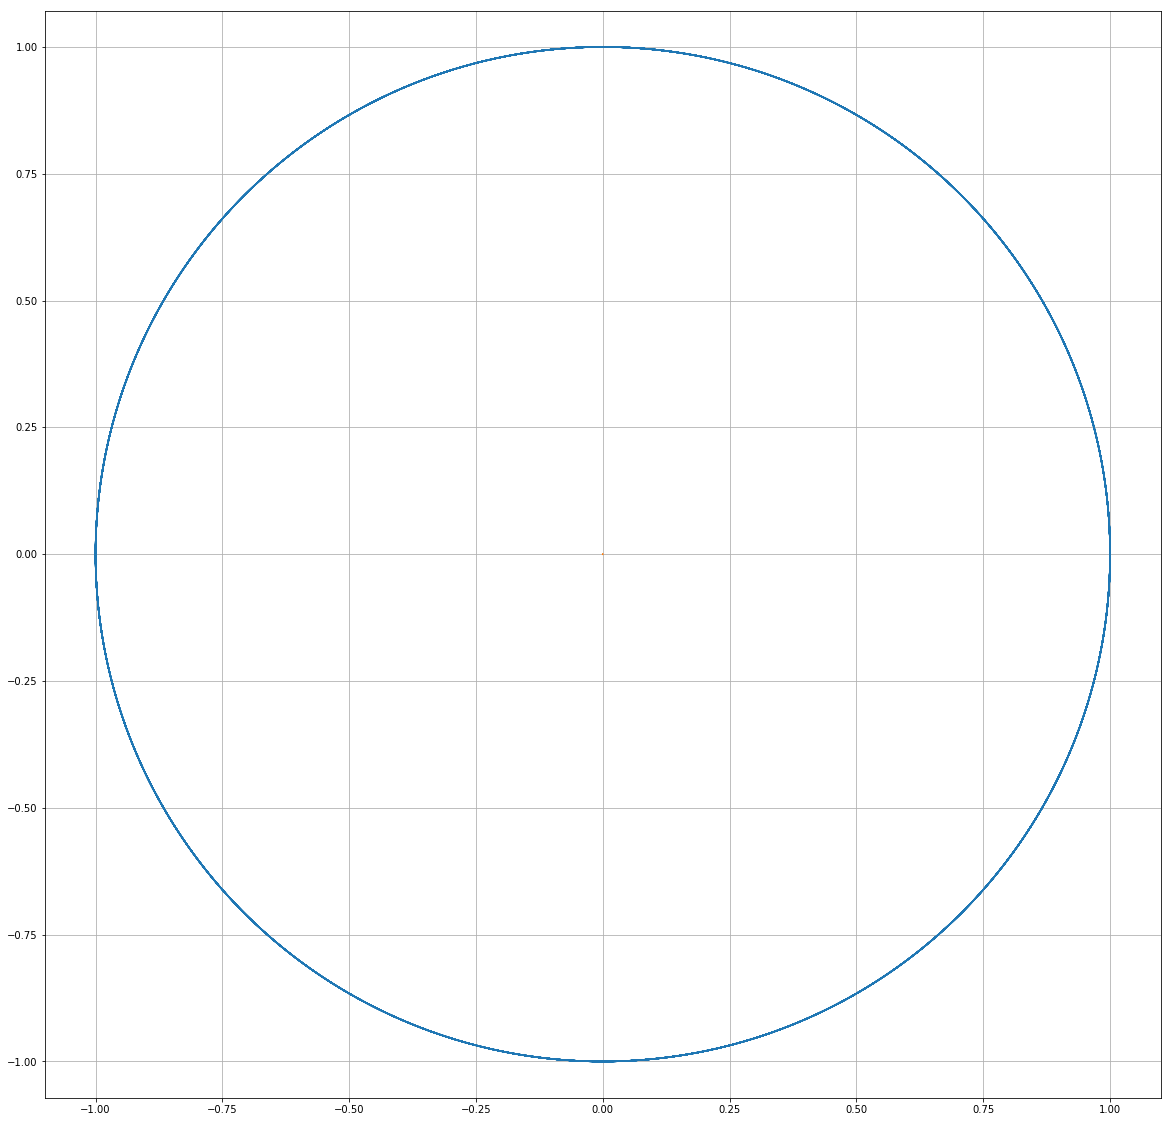

In [4]:
# Run this cell once you get the above working to plot the Earth-Sun system.

plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

Everything should look as it did before in week 6.

Now let's add Jupiter to our system to see what happens. [Here is a NASA page with values in Earth ratio units to help you determine initial values.](https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html)

In the cell below create an Earth-Sun-Jupiter system. For the non-Sun planets you should use values of $(r_i,0)$ for the initial positions and $(0,v_{yi})$ for the initial velocities, where 

$v_{yi} = \sqrt{\dfrac{G M_{Sun}}{r_i}}$. 

These should give roughly circular orbits, since the Sun's mass is so much larger than the other masses.

For the Sun, choose its initial position so that the center of mass of the entire system is at the origin and choose its initial velocity so that the total momentum of the entire system is zero.

In [5]:
## Create code for E-S-J system here and plot the three body system
vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth

Ju_mass = 317.8
Ju_radius = 5.20

vy_Ju = np.sqrt(G_N*Sun_mass/Ju_radius) #Initial v_y of Jupiter
vy_s = -(Ea_mass*vy_Ea+Ju_mass*vy_Ju)/Sun_mass # Initial v_y of the Sun
x_s = 0 # Sun is initially at the origin


Earth = Planet(Ea_mass,Ea_radius,vy_Ea)
Jupiter = Planet(Ju_mass,Ju_radius,vy_Ju)
Sun = Planet(Sun_mass,x_s,vy_s) 

N = 10000 # Number of steps we want to take
tf = 11.9 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Jupiter)
planetlist.append(Sun)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx+h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy+h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h/2*(planet.ax+planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h/2*(planet.ay+planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values
        

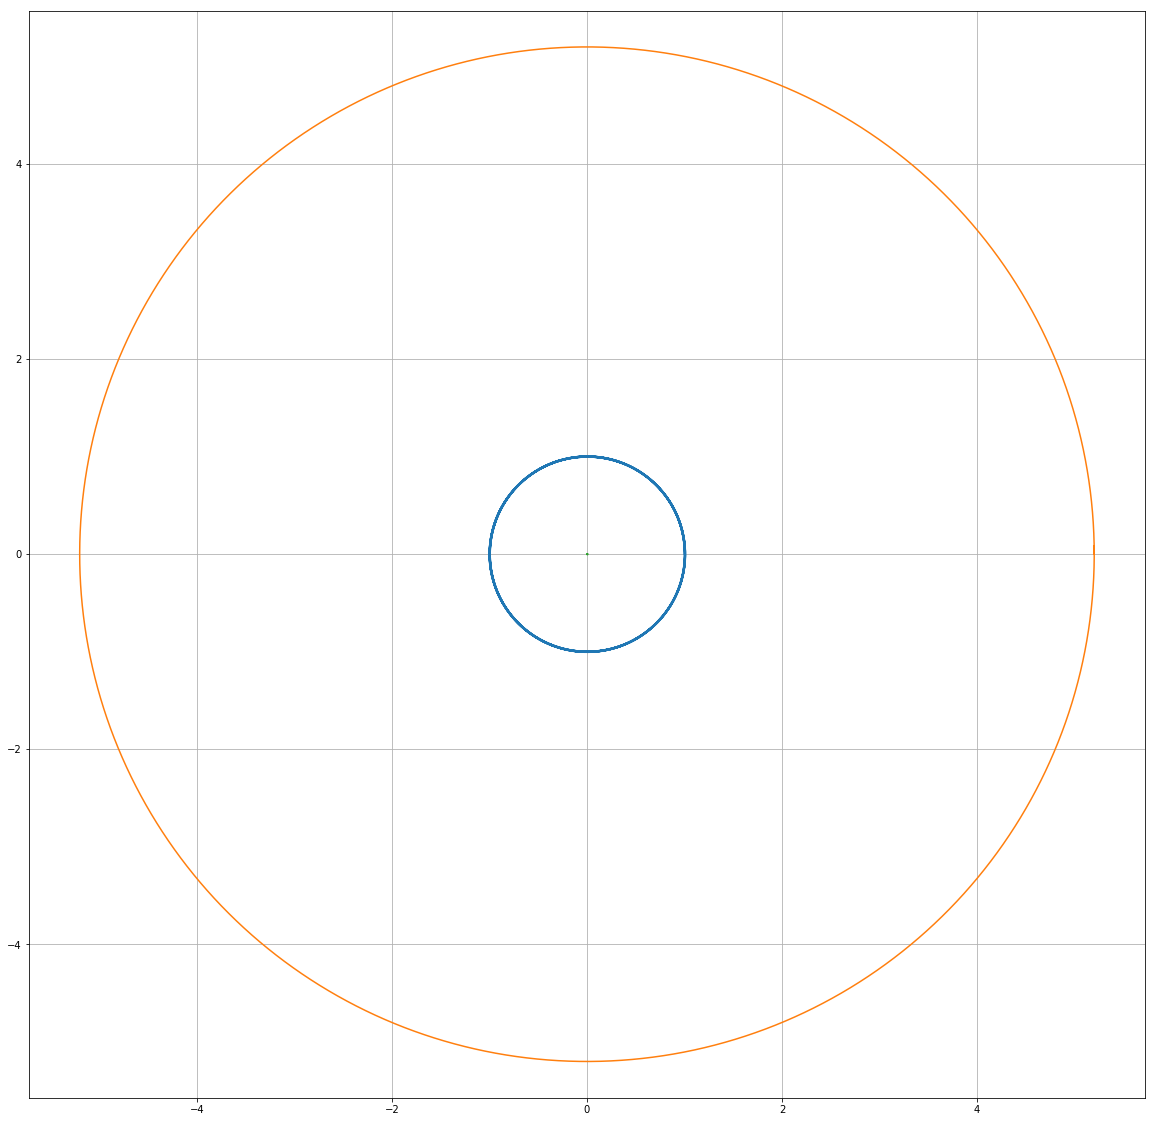

In [6]:
plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

After you have plotted for the Earth-Sun-Jupiter system, take just the Earth class and plot its x and y values in the cell below.

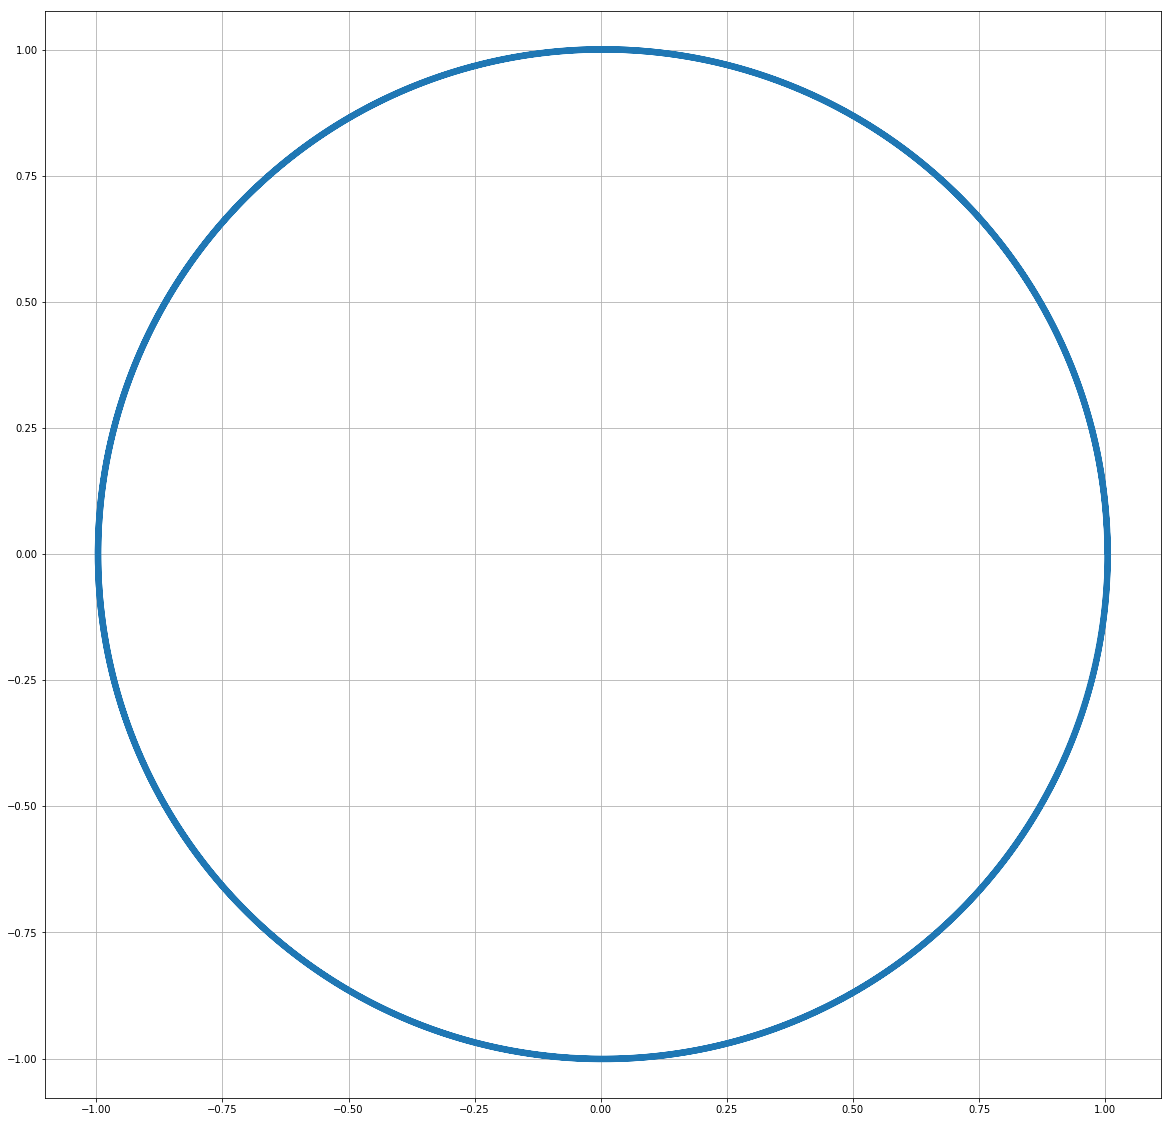

In [7]:
## Plot just the Earth's orbit from the stored information within the Earth class-variable
plt.figure(figsize=(20,20))

plt.plot(Earth.xvals,Earth.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

# Q2.) What do you notice about the Earth's motion now that Jupiter has been introduced into the system? Why is this happening?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.


######################### Possible Answer ###############################

The lines are thicker, indicating that the Earth is wobbling a little around its natural orbit. This is because the Earth is now getting pulled between Jupiter and the Sun.


######################### Possible Answer ###############################

# Q3.) Play around with the mass of Jupiter and plot for the E-S-J system again. What do you notice is happening to the orbits as you vary Jupiter's mass? (Aren't you glad Jupiter isn't  too large?)

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

######################### Possible Answer ###############################

The effect on the Earth's orbit becomes more pronounced as Jupiter's mass becomes larger.  
Also the motion of the Sun around the common center of mass is visible for a heavier Jupiter.

######################### Possible Answer ###############################

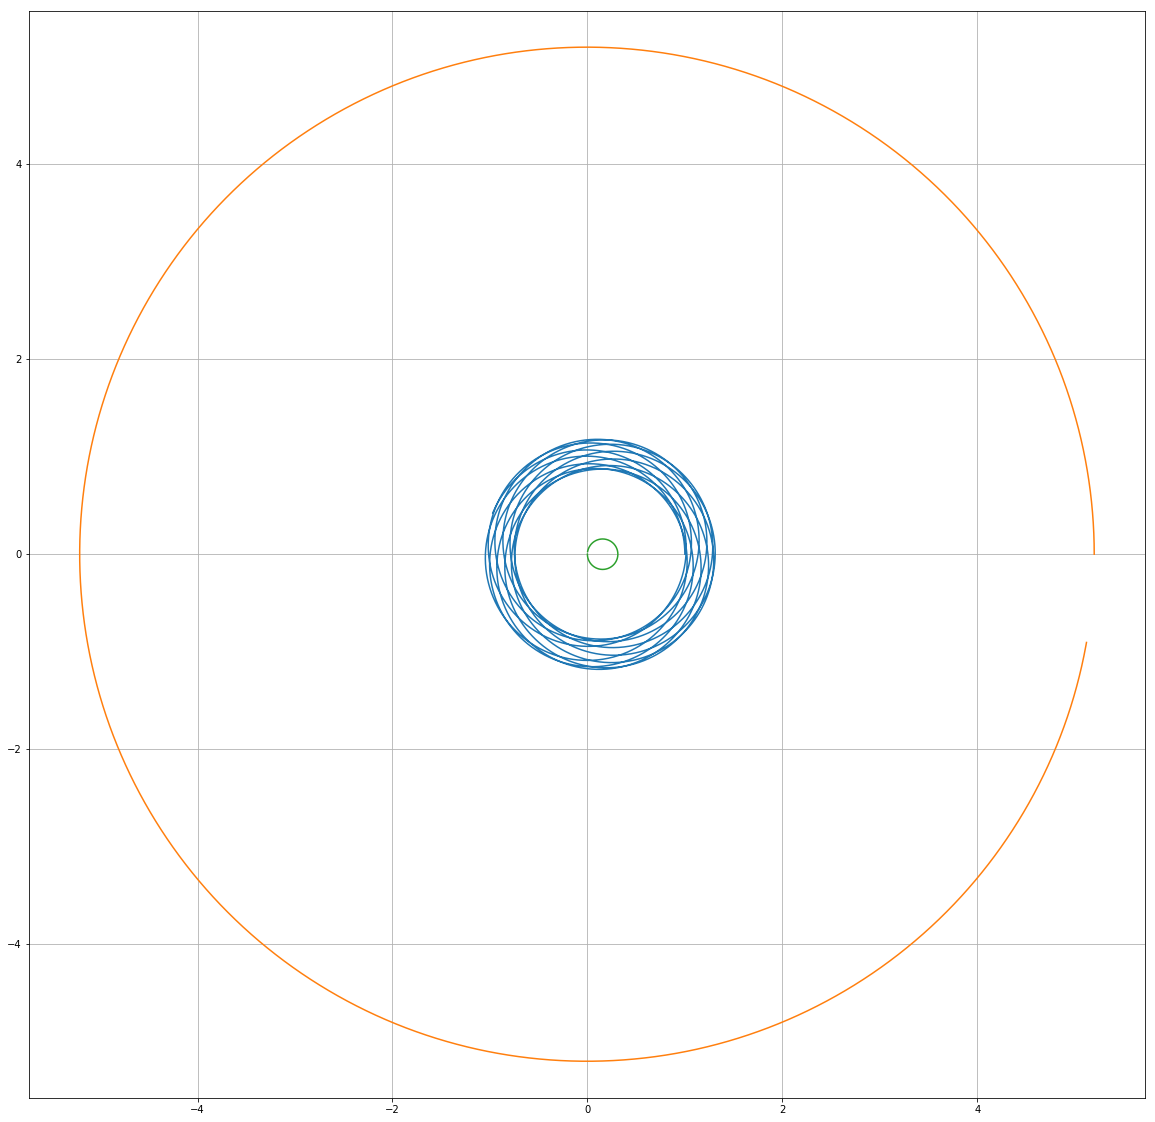

In [8]:
## Here is some space if you want to play with Jupiter's mass in the simulation here
vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth

Ju_mass = 10000
Ju_radius = 5.20

vy_Ju = np.sqrt(G_N*Sun_mass/Ju_radius) #Initial v_y of Jupiter
vy_s = -(Ea_mass*vy_Ea+Ju_mass*vy_Ju)/Sun_mass # Initial v_y of the Sun
x_s = 0 # Sun is initially at the origin


Earth = Planet(Ea_mass,Ea_radius,vy_Ea)
Jupiter = Planet(Ju_mass,Ju_radius,vy_Ju)
Sun = Planet(Sun_mass,x_s,vy_s) 

N = 10000 # Number of steps we want to take
tf = 11.9 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Jupiter)
planetlist.append(Sun)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx+h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy+h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h/2*(planet.ax+planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h/2*(planet.ay+planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values
     
plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

### Now using information from the NASA page:
Create a model of our Solar System with the Earth-ratio values. Include all the planets (Pluto is optional, I don't recognize it as a planet). Feel free to add the moon if you want. [Here is a NASA page with values in Earth ratio units to help you determine initial values.](https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html)

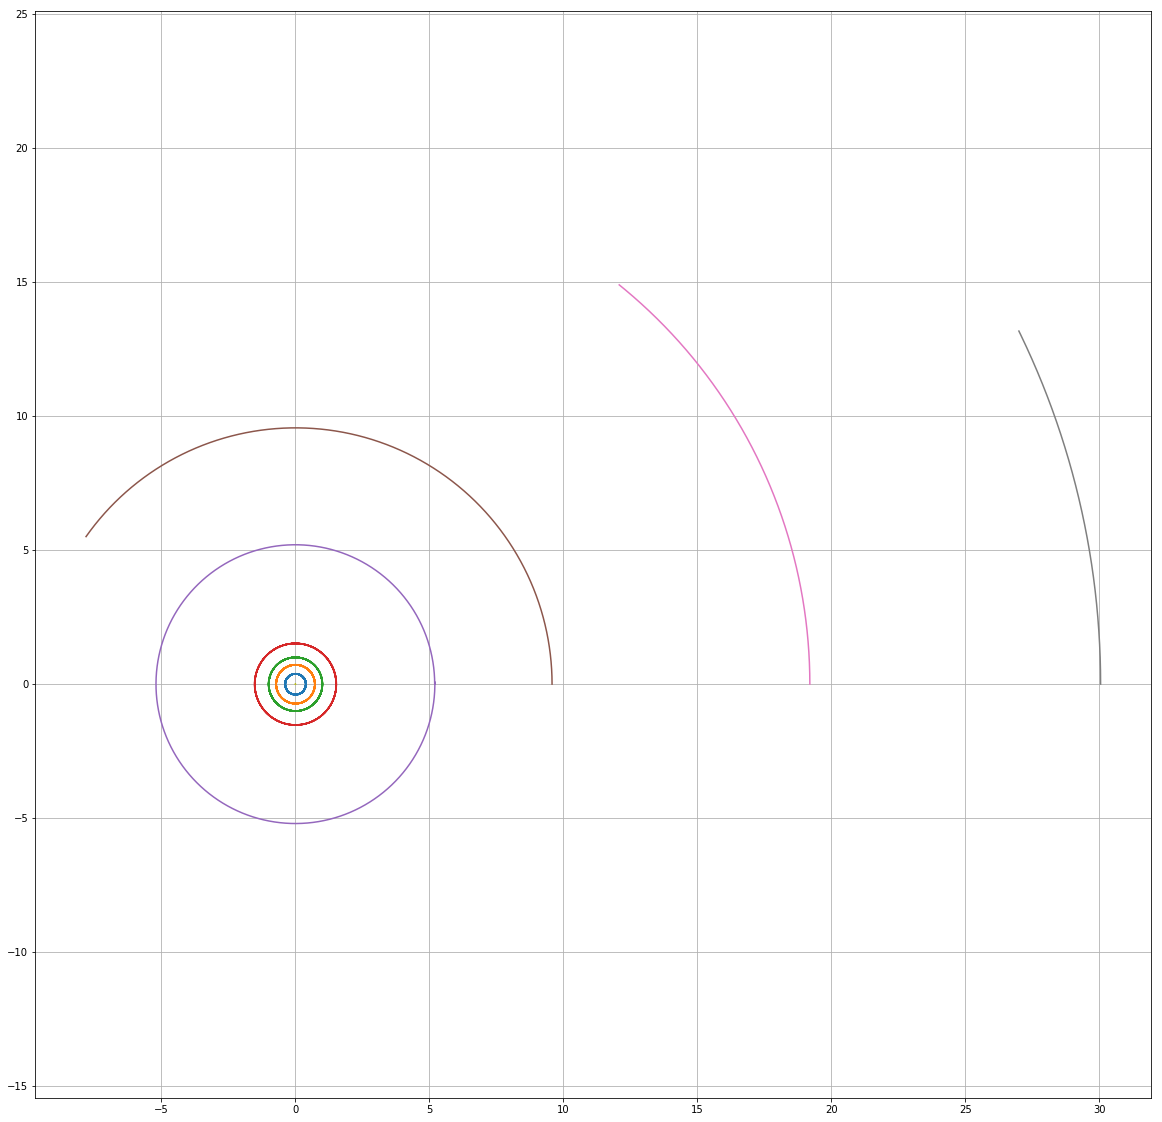

In [9]:
# Create a model of our Solar System in this cell and plot the result
vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth

Me_mass = 0.0553
Me_radius = 0.387
vy_Me = np.sqrt(G_N*Sun_mass/Me_radius)

Ve_mass = 0.815
Ve_radius = 0.723
vy_Ve = np.sqrt(G_N*Sun_mass/Ve_radius)

Ma_mass = 0.107
Ma_radius = 1.52
vy_Ma = np.sqrt(G_N*Sun_mass/Ma_radius)

Ju_mass = 317.8
Ju_radius = 5.20
vy_Ju = np.sqrt(G_N*Sun_mass/Ju_radius) #Initial v_y of Jupiter

Sa_mass = 95.2
Sa_radius = 9.58
vy_Sa = np.sqrt(G_N*Sun_mass/Sa_radius)

Ur_mass = 14.5
Ur_radius = 19.20
vy_Ur = np.sqrt(G_N*Sun_mass/Ur_radius)

Ne_mass = 17.1
Ne_radius = 30.05
vy_Ne = np.sqrt(G_N*Sun_mass/Ne_radius)

vy_s = -(Me_mass*vy_Me+Ve_mass*vy_Ve+Ea_mass*vy_Ea+Ma_mass*vy_Ma+Ju_mass*vy_Ju+Sa_mass*vy_Sa+Ur_mass*vy_Ur+Ne_mass*vy_Ne)/Sun_mass # Initial v_y of the Sun
x_s = 0 # Sun is initially at the origin

Mercury = Planet(Me_mass,Me_radius,vy_Me)
Venus = Planet(Ve_mass,Ve_radius,vy_Ve)
Earth = Planet(Ea_mass,Ea_radius,vy_Ea)
Mars = Planet(Ma_mass,Ma_radius,vy_Ma)
Jupiter = Planet(Ju_mass,Ju_radius,vy_Ju)
Saturn = Planet(Sa_mass,Sa_radius,vy_Sa)
Uranus = Planet(Ur_mass,Ur_radius,vy_Ur)
Neptune = Planet(Ne_mass,Ne_radius,vy_Ne)
Sun = Planet(Sun_mass,x_s,vy_s) 

N = 10000 # Number of steps we want to take
tf = 11.9 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Earth)
planetlist.append(Mars)
planetlist.append(Jupiter)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)
planetlist.append(Sun)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx+h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy+h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h/2*(planet.ax+planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h/2*(planet.ay+planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values
        
        
plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

## Final Challenge: 

Run the simulation for 1 full Neptune orbit. Using the information stored in each planet, determine about how many orbits other planets completed.

### NOTE: This simulation might take a while to run.

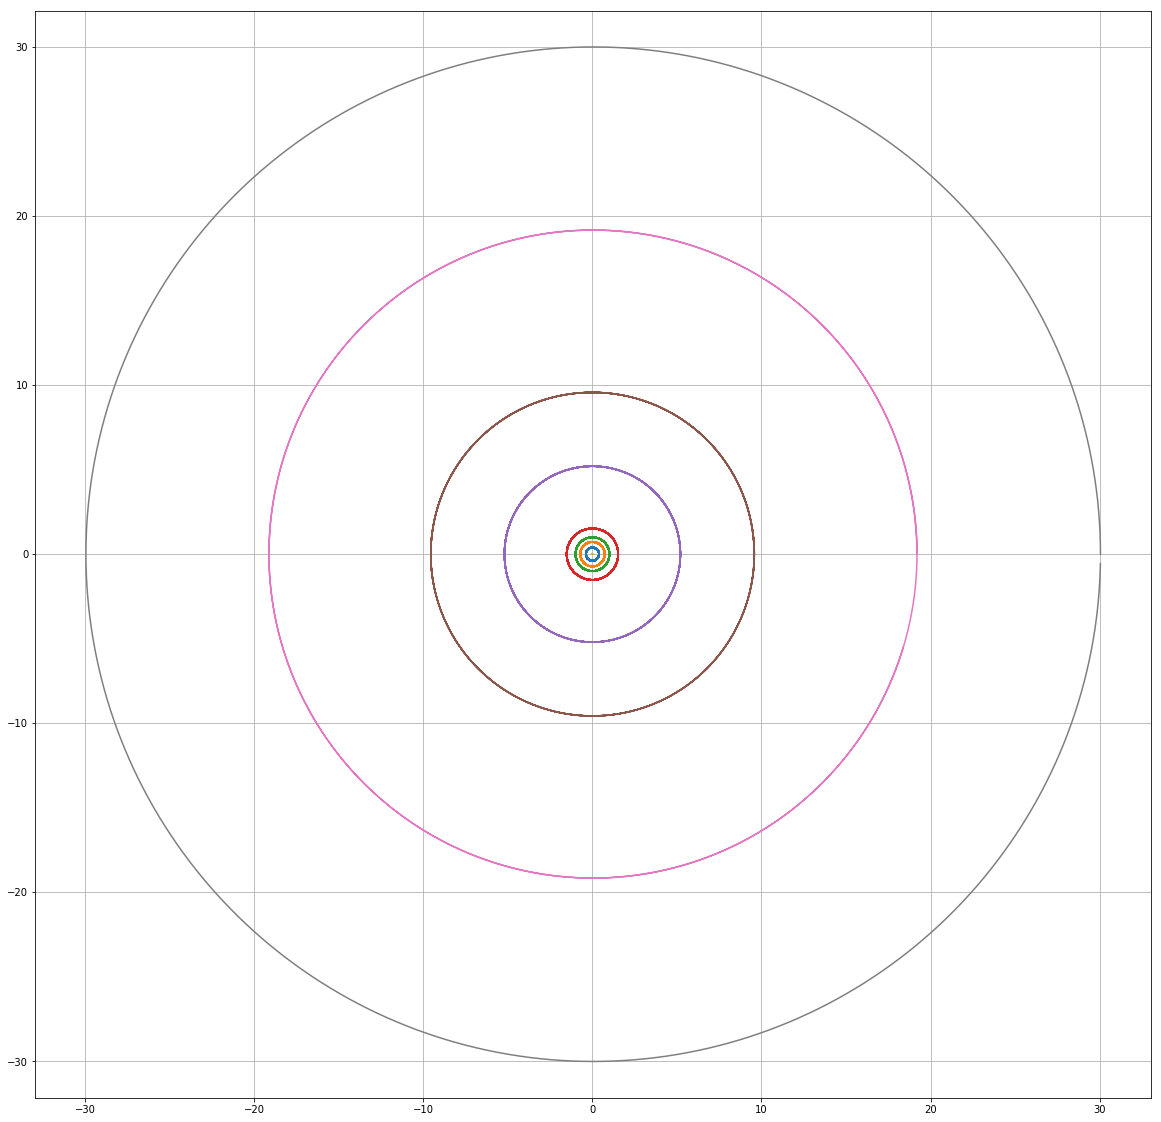

In [10]:
## Here is a free cell for you to run the simulation. Hint: Larger step numbers / smaller step sizes will be helpful here but take longer to perform
vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth

Me_mass = 0.0553
Me_radius = 0.387
vy_Me = np.sqrt(G_N*Sun_mass/Me_radius)

Ve_mass = 0.815
Ve_radius = 0.723
vy_Ve = np.sqrt(G_N*Sun_mass/Ve_radius)

Ma_mass = 0.107
Ma_radius = 1.52
vy_Ma = np.sqrt(G_N*Sun_mass/Ma_radius)

Ju_mass = 317.8
Ju_radius = 5.20
vy_Ju = np.sqrt(G_N*Sun_mass/Ju_radius) #Initial v_y of Jupiter

Sa_mass = 95.2
Sa_radius = 9.58
vy_Sa = np.sqrt(G_N*Sun_mass/Sa_radius)

Ur_mass = 14.5
Ur_radius = 19.20
vy_Ur = np.sqrt(G_N*Sun_mass/Ur_radius)

Ne_mass = 17.1
Ne_radius = 30.05
vy_Ne = np.sqrt(G_N*Sun_mass/Ne_radius)

vy_s = -(Me_mass*vy_Me+Ve_mass*vy_Ve+Ea_mass*vy_Ea+Ma_mass*vy_Ma+Ju_mass*vy_Ju+Sa_mass*vy_Sa+Ur_mass*vy_Ur+Ne_mass*vy_Ne)/Sun_mass # Initial v_y of the Sun
x_s = 0 # Sun is initially at the origin

Mercury = Planet(Me_mass,Me_radius,vy_Me)
Venus = Planet(Ve_mass,Ve_radius,vy_Ve)
Earth = Planet(Ea_mass,Ea_radius,vy_Ea)
Mars = Planet(Ma_mass,Ma_radius,vy_Ma)
Jupiter = Planet(Ju_mass,Ju_radius,vy_Ju)
Saturn = Planet(Sa_mass,Sa_radius,vy_Sa)
Uranus = Planet(Ur_mass,Ur_radius,vy_Ur)
Neptune = Planet(Ne_mass,Ne_radius,vy_Ne)
Sun = Planet(Sun_mass,x_s,vy_s) 

N = 100000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Earth)
planetlist.append(Mars)
planetlist.append(Jupiter)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)
planetlist.append(Sun)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx+h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy+h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h/2*(planet.ax+planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h/2*(planet.ay+planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values
        
        
plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals)
    
plt.grid()
plt.axis('equal')
plt.show()

In [11]:
orbits = np.zeros(8)
itr = 0

for planet in planetlist:
    
    if planet != Sun:
        count = 0
        for i in range(len(planet.yvals)-1):
            if planet.yvals[i] < 0 and planet.yvals[i+1] > 0:
                count +=1
            if planet.yvals[i] > 0 and planet.yvals[i+1] < 0:
                count +=1
        orbits[itr] = count/2
        itr +=1

In [12]:
orbits

array([6.785e+02, 2.655e+02, 1.630e+02, 8.700e+01, 1.350e+01, 5.500e+00,
       1.500e+00, 5.000e-01])

# Q4.) Based on your simulation, how many orbits did each planet complete?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

######################### Possible Answer ###############################

Mercury: 678.5

Venus: 265.5

Earth: 163

Mars: 87

Jupiter: 13.5

Saturn: 5.5

Uranus: 1.5

Neptune: Just less than 1

######################### Possible Answer ###############################



# Q5.) How do these values compare to the actual orbit values? What are possible explanations for any discrepancies?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

######################### Possible Answer ###############################

The actual values are

Mercury: 679

Venus: 266

Earth: 163.7

Mars: 87

Jupiter: 13.8

Saturn: 5.6

Uranus: 1.96

Neptune: 1

The numbers are within our precision for all of the planets. Possible discrepancies could be due to lack of precision in the planetary parameters. (Calculating the orbital period of Neptune from our values for G*M_sun and Neptune radius gives 164.7 years, which explains why it doesn't quite complete one circuit in the true orbital period of 163.7 years.)  Also the Velocity Verlet method is not perfect.  The numbers given here are using N=100,000 steps.  They would be worse if only N=10,000 steps were used (especially for Mercury).

######################### Possible Answer ###############################

In [13]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/H4iwZBqvPM94BsBN9" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Well that is it. The last Notebook and close to the end of the semester.

If you haven't already, hopefully now you are starting to see the world in a new perspective after a semester of analytical and computational work. Don't be afraid to ask questions and explore Physics, or whatever field you end up in the future, with confidence. [Maybe you'll make the next big discovery ](https://lowres.cartooncollections.com/god_particle-particles-discoveries-science-scientists-science-CC136939_low.jpg)